<a href="https://colab.research.google.com/github/MudassirABBASSi/Deep-Learning-/blob/main/Transfer_Learning_with_different_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d salader/dogs-vs-cats

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 39.4MB/s]
100% 1.06G/1.06G [00:08<00:00, 143MB/s] 


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dense
from keras.applications.vgg16 import VGG16,preprocess_input




# vgg16

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 251ms/step - accuracy: 0.8355 - loss: 0.3842 - val_accuracy: 0.9064 - val_loss: 0.2107


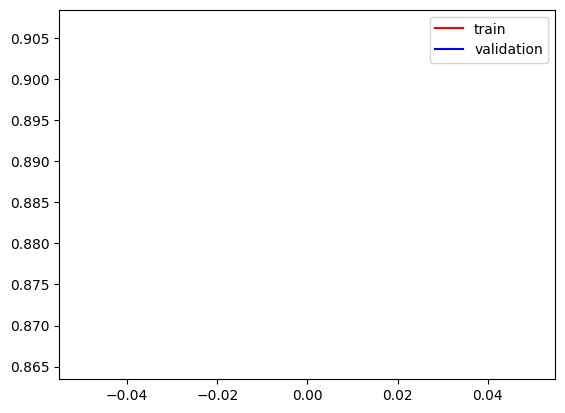

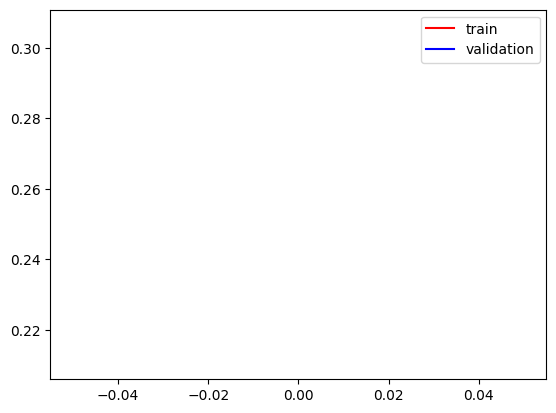

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
Predicted class: Cat


In [ ]:
conv_base = VGG16(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

conv_base.trainable =False


batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# prompt: i want to predict the image which url is  /content/download.jpeg

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("/content/test/cats/cat.10.jpg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model.predict(x)

if prediction[0][0] > 0.5:
  print("Predicted class: Dog")
else:
  print("Predicted class: Cat")





# vgg19

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 265ms/step - accuracy: 0.8032 - loss: 0.4630 - val_accuracy: 0.8934 - val_loss: 0.2536


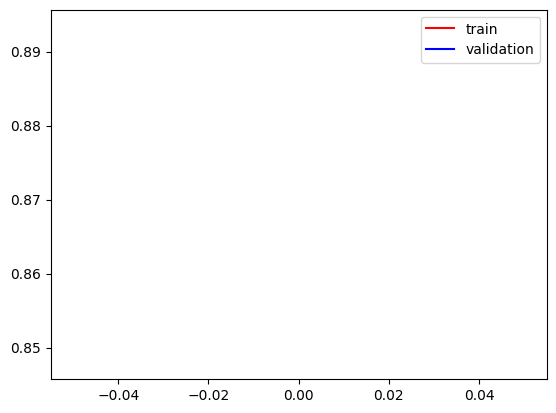

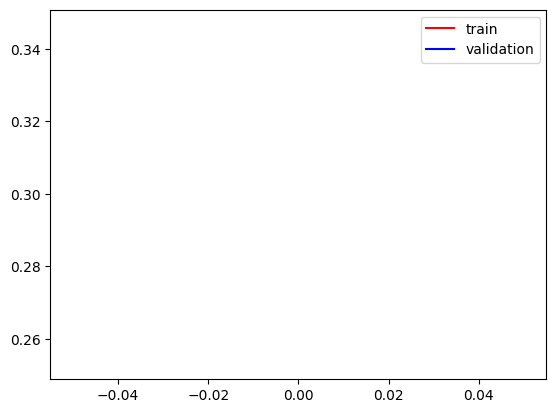

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
Predicted class: Cat


In [ ]:
from keras.applications.vgg19 import VGG19

conv_base1 = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)





model1 = Sequential()
model1.add(conv_base1)
model1.add(layers.Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

conv_base1.trainable =False


batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# prompt: i want to predict the image which url is  /content/download.jpeg

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("/content/test/cats/cat.10.jpg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model1.predict(x)

if prediction[0][0] > 0.5:
  print("Predicted class: Dog")
else:
  print("Predicted class: Cat")





# ResNet50V2

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 227ms/step - accuracy: 0.9294 - loss: 0.9558 - val_accuracy: 0.9638 - val_loss: 0.0969


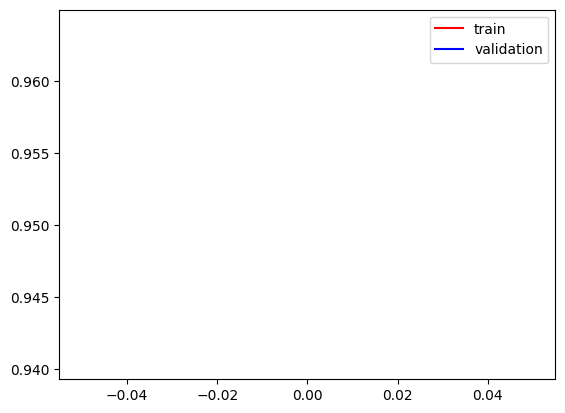

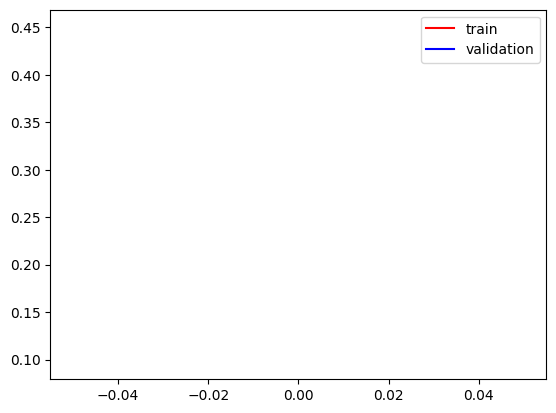

In [ ]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19



# ResNet50V2
conv_base2 = ResNet50V2(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
)

model2 = Sequential()
model2.add(conv_base2)
model2.add(layers.Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

conv_base2.trainable = False

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator)

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()




In [ ]:
img = image.load_img("/content/images.jpeg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model2.predict(x)

if prediction[0][0] > 0.5:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: Cat


#MobileNet

In [ ]:


from tensorflow.keras.applications import MobileNet

conv_base3 = MobileNet(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
)

model3 = Sequential()
model3.add(conv_base3)
model3.add(layers.Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

conv_base3.trainable = False

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


<ipython-input-8-11a5e330cc2a>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base3 = MobileNet(


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
 22/625 ━━━━━━━━━━━━━━━━━━━━ 2:02 203ms/step - accuracy: 0.7512 - loss: 3.8307

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the MobileNet model pre-trained on ImageNet
model = MobileNet(weights='imagenet')

# Load the image you want to predict; adjust target_size as MobileNet expects 224x224
img_path = '/content/1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to an array and expand dimensions to match expected input shape
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Use the model to make predictions
predictions = model.predict(x)

# Decode the predictions into human-readable labels and print top 3 predictions
print("Predicted:", decode_predictions(predictions, top=3)[0])


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n03595614', 'jersey', 0.3074171), ('n04370456', 'sweatshirt', 0.16485779), ('n03710721', 'maillot', 0.0947601)]


In [ ]:
def predict_image(image_path1, image_path2):
    img1 = image.load_img(image_path1, target_size=(150, 150))
    x1 = image.img_to_array(img1)
    x1 = np.expand_dims(x1, axis=0)
    x1 = x1 / 255.0  # Normalize the image

    img2 = image.load_img(image_path2, target_size=(150, 150))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = x2 / 255.0  # Normalize the image


    prediction1 = model3.predict(x1)
    prediction2 = model3.predict(x2)

    print(f"Prediction for {image_path1}:")
    if prediction1[0][0] > 0.5:
        print("Predicted class: Dog")
    else:
        print("Predicted class: Cat")

    print(f"Prediction for {image_path2}:")
    if prediction2[0][0] > 0.5:
        print("Predicted class: Dog")
    else:
        print("Predicted class: Cat")

# Example usage (replace with your image paths)
predict_image("/content/1.jpeg", "/content/2.jpeg")


#NASNetLarge

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 823s 1s/step - accuracy: 0.9810 - loss: 0.7142 - val_accuracy: 0.9846 - val_loss: 0.0972


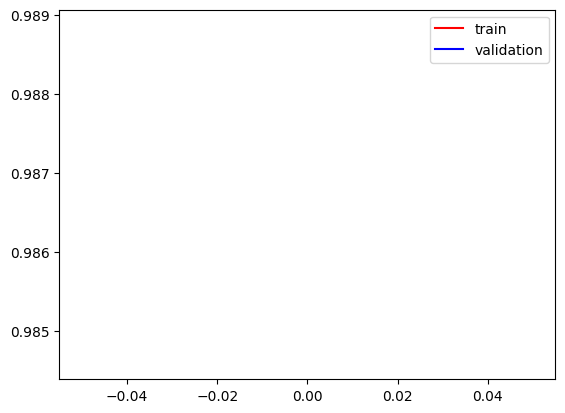

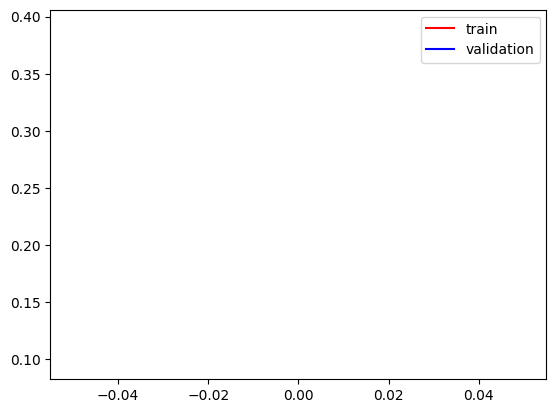

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "nasnet_large" is incompatible with the layer: expected shape=(None, 331, 331, 3), found shape=(1, 150, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 150, 150, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
from tensorflow.keras.applications import NASNetLarge

conv_base4 = NASNetLarge(
    input_shape=(331,331,3),
    include_top=False,
    weights='imagenet',
)

model4 = Sequential()
model4.add(conv_base4)
model4.add(layers.Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

conv_base4.trainable = False

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(331, 331),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(331, 331),
    batch_size=batch_size,
    class_mode='binary')

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model4.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator)

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()



img = image.load_img("/content/images.jpeg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model4.predict(x)

if prediction[0][0] > 0.5:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")
